## Time Series Challenge
In this challenge, we will compare the various time series prediction techniques on the dataset we can find [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).

- moving average
- ARIMA
- Prophet
- (Stretch) LSTMs

There are several item categories in this sales dataset. You can choose your own category or predict the overall sales.

> #### Note
> We have one order in every row, thus don't forget to transform the data into a time series format first. The data can be transformed into a daily, weekly or monthly time series.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot

#Prophet
from fbprophet import Prophet
import itertools
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


import copy

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data
data = pd.read_csv('/content/drive/MyDrive/Deep_Learning/Workbook1.csv', 
                   encoding = 'latin-1')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,16-11-08,16-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,16-11-08,16-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,16-06-12,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,15-10-11,15-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,15-10-11,15-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#check null values
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#Groupby day and take sum sale per day
sales = data.groupby('Order Date')['Sales'].sum().reset_index()
sales

,Order Date,Sales
0,14-01-03,16.4480
1,14-01-04,288.0600
2,14-01-05,19.5360
3,14-01-06,4407.1000
4,14-01-07,87.1580
...,...,...
1232,17-12-26,814.5940
1233,17-12-27,177.6360
1234,17-12-28,1657.3508
1235,17-12-29,2915.5340


In [ ]:
#Data Frame for moving average and ARIMA
date_index = copy.deepcopy(sales[['Order Date', 'Sales']])

#Set order date as index
date_index = date_index.set_index('Order Date')
print(date_index.index)

date_index.head()

Index(['14-01-03', '14-01-04', '14-01-05', '14-01-06', '14-01-07', '14-01-09',
       '14-01-10', '14-01-11', '14-01-13', '14-01-14',
       ...
       '17-12-21', '17-12-22', '17-12-23', '17-12-24', '17-12-25', '17-12-26',
       '17-12-27', '17-12-28', '17-12-29', '17-12-30'],
      dtype='object', name='Order Date', length=1237)


,Sales
Order Date,
14-01-03,16.448
14-01-04,288.060
14-01-05,19.536
14-01-06,4407.100
14-01-07,87.158


# Moving Average

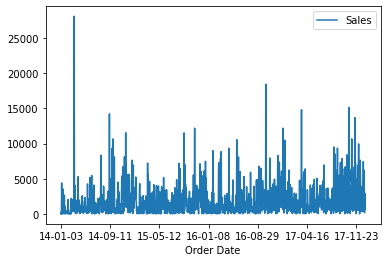

In [ ]:
#plot original data
date_index.plot(kind = 'line')
plt.show()

In [ ]:
# prepare situation
X = date_index.values
window = 12 #months
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

#walk forward over time steps in test
for t in range(len(test)):
  length = len(history)
  yhat = np.mean([history[i] for i in range(length-window, length)])
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=749.107083, expected=64.864000
predicted=753.141750, expected=378.594000
predicted=760.686250, expected=2673.870000
predicted=981.880750, expected=25.248000
predicted=616.726417, expected=46.020000
predicted=613.298250, expected=1097.250000
predicted=701.357083, expected=426.670000
predicted=732.343750, expected=3.928000
predicted=731.842750, expected=240.500000
predicted=455.734833, expected=290.666000
predicted=474.793667, expected=468.900000
predicted=501.372833, expected=211.646000
predicted=494.013000, expected=97.112000
predicted=496.700333, expected=134.384000
predicted=476.349500, expected=330.512000
predicted=281.069667, expected=180.320000
predicted=293.992333, expected=14.560000
predicted=291.370667, expected=2043.400000
predicted=370.216500, expected=129.568000
predicted=345.458000, expected=576.726000
predicted=393.191167, expected=21.360000
predicted=374.929500, expected=9.040000
predicted=351.460667, expected=54.208000
predicted=316.903000, expected=37.784000
p

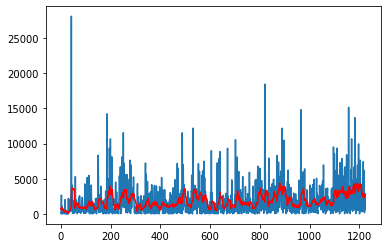

In [ ]:
#plot
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

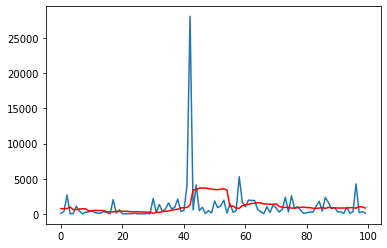

In [ ]:
#zoom into first 100
plt.plot(test[0:100])
plt.plot(predictions[0:100], color = 'red')
plt.show()

# ARIMA

In [ ]:
#define function to test stationarity
def ADF_Stationarity_Test(timeseries, sig):
    #apply adfuller to timeseries
    result = adfuller(timeseries)
    
    #print adfuller test results
    print('ADF Statistic:', result[0])
    print('P-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    
    #Check significance
    if result[1] <= sig:
        print('Reject H0: Timeseries is Stationary')
    else:
        print('Fail to reject H0: Timeseries is Non-Stationary')

In [ ]:
#check shape
date_index.shape

(1237, 1)

In [ ]:
#change dataframe into 1D array
date_index_2 = date_index.iloc[:,0].values
ADF_Stationarity_Test(date_index_2, 0.05)

ADF Statistic: -5.839520598260235
P-value: 3.8063303733321307e-07
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Reject H0: Timeseries is Stationary


In [ ]:
# define function to evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
#         print(p)
        for d in d_values:
#             print(d)
            for q in q_values:
#                 print(q)
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order, mse))
                except Exception as e:
                    print(e)
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# define function to evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# parameters to evaluate
p_values = [0, 1, 2, 4, 6]
d_values = range(0, 3)
q_values = range(0, 3)

#evaluate
evaluate_models(date_index.values, p_values, d_values, q_values)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) RMSE=2621.064
ARIMA(0, 0, 1) RMSE=2605.664
ARIMA(0, 0, 2) RMSE=2592.243


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) RMSE=3461.489
ARIMA(0, 1, 1) RMSE=2515.040
ARIMA(0, 1, 2) RMSE=2517.346


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0) RMSE=5991.332
ARIMA(0, 2, 1) RMSE=3464.916
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(1, 0, 0) RMSE=2602.325
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
ARIMA(1, 1, 0) RMSE=3005.125
ARIMA(1, 1, 1) RMSE=2517.742


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/s

ARIMA(1, 1, 2) RMSE=2518.214
ARIMA(1, 2, 0) RMSE=4375.896
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(2, 0, 0) RMSE=2589.473
ARIMA(2, 0, 1) RMSE=2533.253


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
ARIMA(2, 1, 0) RMSE=2908.006


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1) RMSE=2520.635


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

ARIMA(2, 1, 2) RMSE=2526.496


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0) RMSE=3915.051
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(4, 0, 0) RMSE=2590.129
ARIMA(4, 0, 1) RMSE=2545.276


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(4, 0, 2) RMSE=2531.919
ARIMA(4, 1, 0) RMSE=2778.331
ARIMA(4, 1, 1) RMSE=2529.657


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lo

ARIMA(4, 1, 2) RMSE=2527.718
ARIMA(4, 2, 0) RMSE=3489.839
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(6, 0, 0) RMSE=2573.317
ARIMA(6, 0, 1) RMSE=2526.659
ARIMA(6, 0, 2) RMSE=2526.987
ARIMA(6, 1, 0) RMSE=2633.375
ARIMA(6, 1, 1) RMSE=2529.211


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/s

SVD did not converge
ARIMA(6, 2, 0) RMSE=3195.616
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
Best ARIMA(0, 1, 1) RMSE=2515.040


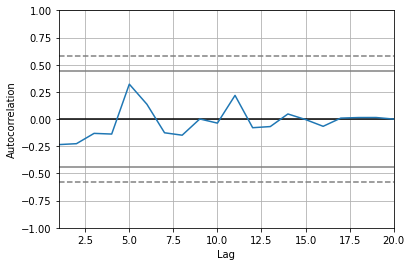

In [ ]:
#Let us view it visually
autocorrelation_plot(date_index[0:20])
plt.show()

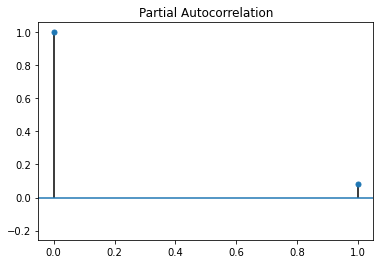

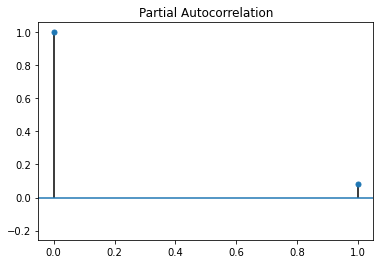

In [ ]:
plot_pacf(date_index[0:100], lags = 1)

In [ ]:
# split into train and test sets
X = date_index.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2136.632765, expected=2101.182000
predicted=2136.646051, expected=425.886000
predicted=2064.015825, expected=2043.126000
predicted=2064.666443, expected=4751.082000
predicted=2179.006523, expected=3839.312000
predicted=2256.390992, expected=1232.004000
predicted=2210.629904, expected=615.570000
predicted=2142.983758, expected=1322.145000
predicted=2110.972601, expected=2286.050000
predicted=2119.592724, expected=3443.091000
predicted=2174.712587, expected=2698.166500
predicted=2198.101813, expected=1992.985800
predicted=2191.289728, expected=99.136000
predicted=2108.911125, expected=1307.792000
predicted=2079.890030, expected=525.884000
predicted=2023.681298, expected=781.414000
predicted=1980.294194, expected=18452.972000
predicted=2603.763539, expected=1680.696000
predicted=2558.664996, expected=5912.782000
predicted=2732.373674, expected=830.400000
predicted=2633.117191, expected=973.712000
predicted=2555.243596, expected=561.536000
predicted=2468.993660, expected=546.9200

Test RMSE: 2515.039


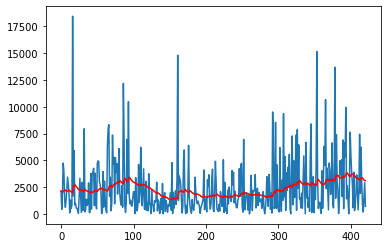

In [ ]:
# # evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

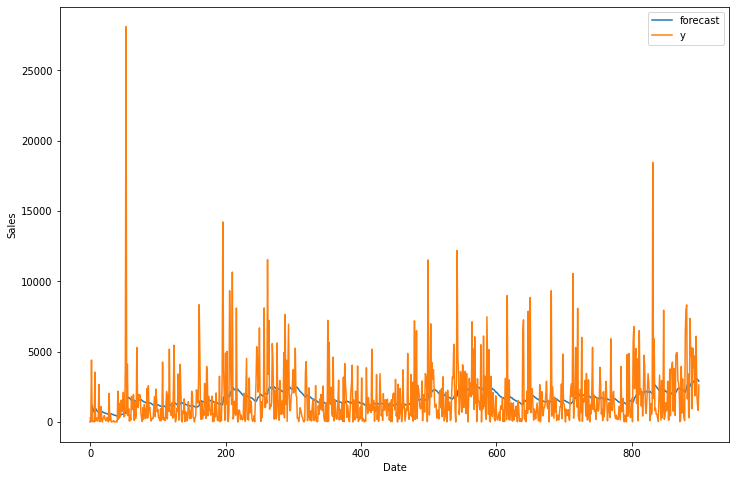

In [ ]:
# find the best params (P,D,Q) for ARIMA model
model = ARIMA(date_index.values, order=(0,1,1))
results = model.fit(disp=-1)

# plot the predictions
fix,ax = plt.subplots(figsize=(12,8))
results.plot_predict(1,900, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.show()

# Prophet

In [ ]:
#Data Frame for Prophet
prop = copy.deepcopy(sales)

#rename columns
prop = prop.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

#convert ds to date time
prop['ds'] = pd.to_datetime(prop['ds'])

#view prophet table
prop.head(3)

,ds,y
0,2003-01-14,16.448
1,2004-01-14,288.060
2,2005-01-14,19.536


In [ ]:
#instantiate prophet
p = Prophet()

#fit model
p.fit(prop)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#create future dataframe
future = p.make_future_dataframe(periods=365)

#create forecast object
forecast = p.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1597,2032-12-11,2926.759127,354.663137,5812.622839
1598,2032-12-12,2953.898302,113.557506,5634.703919
1599,2032-12-13,2756.024605,170.875297,5654.159421
1600,2032-12-14,2687.595672,49.630546,5595.981193
1601,2032-12-15,2643.364609,-159.184089,5604.349579


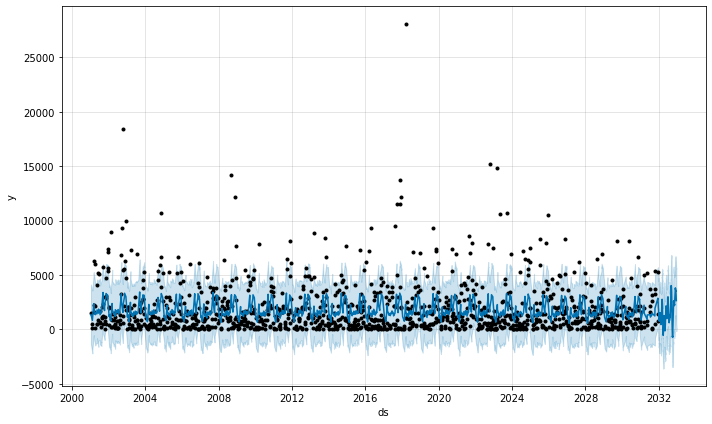

In [ ]:
#plot forecast
fig1 = p.plot(forecast)

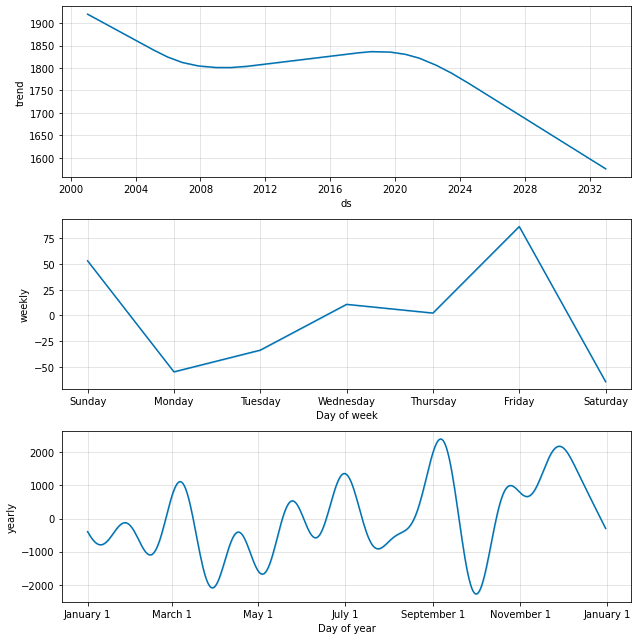

In [ ]:
#plot components
fig2 = p.plot_components(forecast)

In [ ]:
# ref: https://nbviewer.jupyter.org/github/ryankarlos/prophet/blob/9e6d9548d1caca27af3367819bab10a65da10392/notebooks/diagnostics.ipynb#Hyperparameter-Optimisation
# ref2: https://medium.com/analytics-vidhya/time-series-analysis-using-prophet-in-python-part-2-hyperparameter-tuning-and-cross-validation-88e7d831a067

# def create_param_combinations(**param_dict):
#     param_iter = itertools.product(*param_dict.values())
#     params =[]
#     for param in param_iter:
#         params.append(param) 
#     params_df = pd.DataFrame(params, columns=list(param_dict.keys()))
#     return params_df

# def single_cv_run(history_df, metrics, param_dict):
#     m = Prophet(**param_dict)
#     m.add_country_holidays(country_name='US')
#     m.fit(history_df)
#     df_cv = cross_validation(m, initial='400 days', period='90 days', horizon = '180 days')
#     df_p = performance_metrics(df_cv).mean().to_frame().T
#     df_p['params'] = str(param_dict)
#     df_p = df_p.loc[:, metrics]
#     return df_p

# LSTM

In [ ]:
#LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
print(date_index.shape)
date_index.head()


(1237, 1)


,Sales
Order Date,
14-01-03,16.448
14-01-04,288.060
14-01-05,19.536
14-01-06,4407.100
14-01-07,87.158


In [ ]:
date_index.tail()

,Sales
Order Date,
17-12-26,814.5940
17-12-27,177.6360
17-12-28,1657.3508
17-12-29,2915.5340
17-12-30,713.7900


In [ ]:
#create train and test datasets
train = date_index[:990] #80%
test = date_index [990:] #20%

In [ ]:
#check test
test.head(3)

,Sales
Order Date,
17-04-06,114.4200
17-04-07,1971.2905
17-04-08,6401.9300


In [ ]:
#make train into array
training_set = train.values
training_set

array([[1.6448000e+01],
       [2.8806000e+02],
       [1.9536000e+01],
       [4.4071000e+03],
       [8.7158000e+01],
       [4.0544000e+01],
       [5.4830000e+01],
       [9.9400000e+00],
       [3.5537950e+03],
       [6.1960000e+01],
       [1.4995000e+02],
       [2.9996400e+02],
       [6.4864000e+01],
       [3.7859400e+02],
       [2.6738700e+03],
       [2.5248000e+01],
       [4.6020000e+01],
       [1.0972500e+03],
       [4.2667000e+02],
       [3.9280000e+00],
       [2.4050000e+02],
       [2.9066600e+02],
       [4.6890000e+02],
       [2.1164600e+02],
       [9.7112000e+01],
       [1.3438400e+02],
       [3.3051200e+02],
       [1.8032000e+02],
       [1.4560000e+01],
       [2.0434000e+03],
       [1.2956800e+02],
       [5.7672600e+02],
       [2.1360000e+01],
       [9.0400000e+00],
       [5.4208000e+01],
       [3.7784000e+01],
       [9.5590000e+01],
       [8.8500000e+00],
       [1.9440000e+01],
       [1.1364000e+01],
       [5.5672000e+01],
       [1.945600

In [ ]:
#Apply minmax scaler

#instantiate scaler
scaler = MinMaxScaler(feature_range = (0,1))

#fit transform training data
training_set_scaled = scaler.fit_transform(training_set)

#Check shape and array
print(training_set_scaled.shape)
print(training_set_scaled)

(990, 1)
[[5.13188350e-04]
 [1.01774825e-02]
 [6.23063246e-04]
 [1.56738069e-01]
 [3.02913845e-03]
 [1.37055412e-03]
 [1.87886784e-03]
 [2.81625583e-04]
 [1.26376412e-01]
 [2.13256214e-03]
 [5.26335621e-03]
 [1.06010417e-02]
 [2.23589009e-03]
 [1.33987952e-02]
 [9.50675814e-02]
 [8.26303338e-04]
 [1.56539704e-03]
 [3.89694731e-02]
 [1.51093994e-02]
 [6.77111163e-05]
 [8.48523828e-03]
 [1.02702072e-02]
 [1.66119955e-02]
 [7.45857693e-03]
 [3.38331419e-03]
 [4.70949850e-03]
 [1.16879776e-02]
 [6.34395874e-03]
 [4.46010952e-04]
 [7.26346716e-02]
 [4.53813920e-03]
 [2.04485792e-02]
 [6.87963444e-04]
 [2.49602460e-04]
 [1.85673630e-03]
 [1.27234987e-03]
 [3.32915953e-03]
 [2.42842022e-04]
 [6.19647446e-04]
 [3.32293282e-04]
 [1.90882725e-03]
 [6.20216746e-04]
 [7.83188116e-02]
 [7.12902341e-03]
 [4.78164659e-02]
 [1.31090927e-02]
 [2.50327250e-02]
 [5.54724832e-02]
 [2.63276689e-02]
 [3.26027068e-02]
 [7.49527899e-02]
 [1.31208345e-02]
 [1.67194509e-02]
 [1.40842431e-01]
 [1.00000000e+00]
 

In [ ]:
X_train = []
y_train = []

# Training range, from timestep 60 to time step 360, #short, to save computational time. 
for i in range(60, 360):
    X_train.append(training_set_scaled[i-60:i, 0]) #Use the last 60 days to predict stock price
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#Reshape X-train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#instantiate model
regressor = Sequential() 

#add kayers
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1)) #Deactivate 10% of nodes

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

#Commpile regressor
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fit data
regressor.fit(X_train, y_train, epochs = 100, batch_size = 52)

Epoch 1/100
6/6 [==============================] - 10s 20ms/step - loss: 0.0063
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0054
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0053
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0052
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0053
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0053
Epoch 8/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0052
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 10/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 11/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 12/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 13/100
6/6 [==============================

In [ ]:
#Combine original with test data
sales_total = pd.concat((date_index, test), axis=0)

#test inputs
test_inputs = sales_total[len(sales_total) - len(test) - 60:].values

#reshape test inputs and transform wuth scaler
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

#create empty list
test_features = []

#Test from time step 60 to time step 200, It will show 140 predicted timesteps 
for i in range(60, 200):
    test_features.append(test_inputs[i-60:i, 0])

#turn test features into array and reshape
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0],test_features.shape[1], 1))

#Create predictions and inverse
predictions_test = regressor.predict(test_features)
predictions_test = scaler.inverse_transform(predictions_test)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


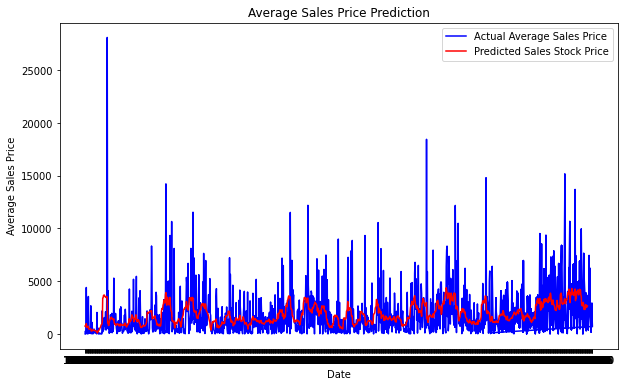

In [ ]:
#plot predictions
plt.figure(figsize=(10,6))
plt.plot(sales_total, color='blue', label='Actual Average Sales Price')
plt.plot(predictions , color='red', label='Predicted Sales Stock Price')
plt.title('Average Sales Price Prediction')
plt.xlabel('Date')
plt.ylabel('Average Sales Price')
plt.legend()
plt.show()